In [182]:
import pandas as pd
import numpy as np
import altair as alt
import nbformat

import json
import glob
import os

import matplotlib.pyplot as plt
import networkx as nx

In [183]:
df = pd.read_csv('data/processed/lol/events.csv')

{'Age': 22, 'Gender': 'M'}
{'weight': 0.6}


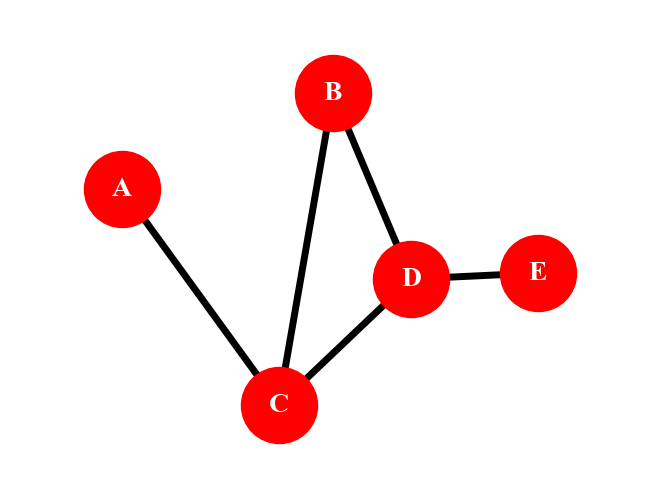

[('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
{'weight': 0.8}


In [184]:
G = nx.Graph()
# G.graph["Name"]="My Graph"
# print(G.graph)
# G.add_nodes_from("ABCDE")
# G.add_edges_from(["AC", "BC", "BD", "CD", "DE"])
G.add_nodes_from([
    ("A", {"Age":19, "Gender":"F"}),
    ("B", {"Age":18, "Gender":"M"}),
    ("C", {"Age":22, "Gender":"M"}),
    ("D", {"Age":21, "Gender":"M"}),
    ("E", {"Age":20, "Gender":"F"})
])
# G.add_node("A",Age=19,Gender="F")
# G.add_node("B",Age=18,Gender="M")
# G.add_node("C",Age=22,Gender="M")
# G.add_node("D",Age=21,Gender="M")
# G.add_node("E",Age=20,Gender="F")

G.add_edges_from([
    ("A", "C", {"weight":1}),
    ("B", "C", {"weight":0.5}),
    ("B", "D", {"weight":0.6}),
    ("C", "D", {"weight":0.8}),
    ("D", "E", {"weight":1}),
])
# G.add_edge("A","C",weight=1)
# G.add_edge("B","C",weight=0.5)
# G.add_edge("B","D",weight=0.6)
# G.add_edge("C","D",weight=0.8)
# G.add_edge("D","E",weight=1)
pos={
    "A":(1,5),
    "B":(4.5,6.6),
    "C":(3.6,1.4),
    "D":(5.8,3.5),
    "E":(7.9,3.6)
}
print("==============================================")
print(G.nodes["C"])
print(G.edges[("B","D")])
print("==============================================")
nx.draw(G,
        pos=pos,
        with_labels=True,
        node_color="red",
        node_size=3000,
        font_color="white",
        font_size=20,
        font_family="Times New Roman",
        font_weight="bold",
        width=5)
plt.margins(0.2)
plt.show()
print(G.edges)
print(G.edges[("C", "D")])

In [307]:
selectedTeam = df.loc[df['u'] == 1740, ['u', 'v', 'u_type', 'v_type', 'e_type']].head(8)
# selectedTeam.at[744470, 'v_type'] = 2
# selectedTeam.at[744470, 'v'] = 1492
selectedTeam
# selectedTeam.at[]
# selectedTeam = selectedTeam[['u', 'v', 'u_type', 'v_type']]
# selectedTeamTuple = list(selectedTeam.itertuples(index=False, name=None))
# len(selectedTeamTuple)
# selectedTeamTuple
teamTypeDF = selectedTeam.drop_duplicates()
teamTypeDF
# nodes = list(set(selectedTeam[['u', 'u_type']].unique()) | set(selectedTeam[['v', 'v_type']].unique()))
# nodes
us = list(teamTypeDF[['u', 'u_type']].itertuples(index=False, name=None))
vs = list(teamTypeDF[['v', 'v_type']].itertuples(index=False, name=None))
nodesList = list(list(dict.fromkeys(us + vs)))
# nodesList = list(list(dict.fromkeys(us)) | list(dict.fromkeys(vs)))
# vs = teamTypeDF[['v', 'v_type']]
nodesList = list(map(lambda x: (x[0], {'Type': x[1]}), nodesList))
nodesList
# vs = list(map(lambda x: (x[0], {'Type': x[1]}), vs))
# us
# vs
teamTypeDF
edgeUV = list(selectedTeam[['u', 'v']].itertuples(index=False, name=None))
edgeUVformatted = []
# for edge in edgeUV:
#     if edge in edgeUVformatted:

#     else:
edgesWithDups = selectedTeam.groupby(selectedTeam.columns.tolist(),as_index=False).size()
edgesWithDups
edgesWithDupsList = list(edgesWithDups[['u', 'v', 'e_type', 'size']].itertuples(index=False, name=None))
# Change arrow display direction if edge type is 1 or 2:
# edgesWithDupsList = list(map(lambda x: (x[0], x[1], {'edge_type': x[2], 'weight': x[3]}), edgesWithDupsList))
edgesWithDupsList = list(map(lambda x: (x[1] if x[2] == 3 else x[0], x[0] if x[2] == 3 else x[1], {'edge_type': x[2], 'weight': x[3]}), edgesWithDupsList))
edgesWithDupsList
# nodesList
selectedTeam
edgesWithDupsList


[(1740, 1455, {'edge_type': 1, 'weight': 1}),
 (2627, 1740, {'edge_type': 3, 'weight': 1}),
 (1740, 2627, {'edge_type': 4, 'weight': 1}),
 (3493, 1740, {'edge_type': 3, 'weight': 1}),
 (5002, 1740, {'edge_type': 3, 'weight': 1}),
 (6746, 1740, {'edge_type': 3, 'weight': 1}),
 (9932, 1740, {'edge_type': 3, 'weight': 1}),
 (1740, 9932, {'edge_type': 4, 'weight': 1})]

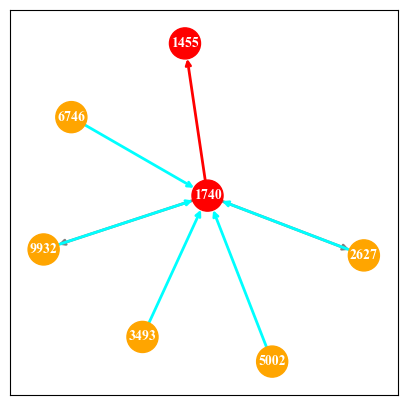

In [311]:
focusGraph = nx.DiGraph()

colorMap = {
    1: 'red',
    2: 'orange'
}
edgeColorMap = {
    1: 'red',
    2: 'green',
    3: 'cyan',
    4: 'gray'
}
arrowMap = {
    1: '<-',
    2: '<-',
    3: '->',
    4: '-'
}
# G.add_nodes_from([
#     ("A", {"Age":19, "Gender":"F"}),
#     ("B", {"Age":18, "Gender":"M"}),
#     ("C", {"Age":22, "Gender":"M"}),
#     ("D", {"Age":21, "Gender":"M"}),
#     ("E", {"Age":20, "Gender":"F"})
# ])
# nodesList = 'AB'
focusGraph.add_nodes_from(nodesList)
# print(focusGraph.nodes())
# print(focusGraph.nodes[1740])
# G.add_node("A",Age=19,Gender="F")
# G.add_node("B",Age=18,Gender="M")
# G.add_node("C",Age=22,Gender="M")
# G.add_node("D",Age=21,Gender="M")
# G.add_node("E",Age=20,Gender="F")
# focusGraph.nodes[1492]
# nx.get_node_attributes(focusGraph, 'Type')
# edgesWithDupsList = [('A', 'B')]
# edgesWithDupsList = [('B', 'A')]
focusGraph.add_edges_from(edgesWithDupsList)
# nx.get_edge_attributes(focusGraph, 'weight')
# G.add_edges_from([
#     ("A", "C", {"weight":1}),
#     ("B", "C", {"weight":0.5}),
#     ("B", "D", {"weight":0.6}),
#     ("C", "D", {"weight":0.8}),
#     ("D", "E", {"weight":1}),
# ])
# G.add_edge("A","C",weight=1)
# G.add_edge("B","C",weight=0.5)
# G.add_edge("B","D",weight=0.6)
# G.add_edge("C","D",weight=0.8)
# G.add_edge("D","E",weight=1)
# focusGraph.nodes[1492]['Type']
colorValues = [colorMap.get(focusGraph.nodes[node]['Type'], 'blue') for node in focusGraph.nodes()]
edgeColorValues = [edgeColorMap.get(focusGraph.edges[edge]['edge_type'], 'black') for edge in focusGraph.edges()]
# arrowValues = ['->' for edge in focusGraph.edges()]
# colorValues = [print(node['Type']) for node in focusGraph.nodes()]
# for edge in focusGraph.edges():
#     print(focusGraph.edges[edge]['edge_type'])
#     focusGraph.edges[edge]['arrowstyle'] = '->'
# nx.draw(focusGraph,
#         # pos=pos,
#         with_labels=True,
#         node_color=colorValues,
#         edge_color=edgeColorValues,
#         node_size=3000,
#         font_color="white",
#         font_size=20,
#         font_family="Times New Roman",
#         font_weight="bold",
#         width=5)
options = {
    'arrowstyle': '->',
    'arrowsize': 8
}
FIG_SIZE = 5
fig = plt.figure(figsize=(FIG_SIZE, FIG_SIZE))
# pos = nx.spectral_layout(focusGraph)
# pos=nx.random_layout(focusGraph, seed=13)
nx.draw_networkx(
    focusGraph,
    # pos=pos,
    arrows=True,
    **options,
    with_labels=True,
    node_color=colorValues,
    edge_color=edgeColorValues,
    node_size=500,
    font_color="white",
    font_size=10,
    font_family="Times New Roman",
    font_weight="bold",
    width=2)
# nx.draw_networkx(focusGraph,
#     arrows=True,
#     **options,
#     with_labels=True,
#     node_color='red',
#     edge_color='blue',
#     node_size=3000,
#     font_color="white",
#     font_size=20,
#     font_family="Times New Roman",
#     font_weight="bold",
#     width=2)

# pos=nx.spring_layout(focusGraph,seed=5)
# fig, ax = plt.subplots()
# nx.draw_networkx_nodes(focusGraph, pos, ax=ax)
# nx.draw_networkx_labels(focusGraph, pos, ax=ax)
# fig.savefig("1.png", bbox_inches='tight',pad_inches=0)

# curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
# straight_edges = list(set(G.edges()) - set(curved_edges))
# nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
# arc_rad = 0.25
# nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')
# fig.savefig("2.png", bbox_inches='tight',pad_inches=0)

# nx.draw_networkx_nodes(focusGraph,
#     node_color=colorValues,
#     node_size=3000)

# pos = nx.spring_layout(focusGraph)

# pos = nx.spectral_layout(focusGraph)
# pos=nx.random_layout(focusGraph, seed=13)
# nx.draw_networkx_nodes(
#     focusGraph, 
#     pos,
#     node_color = colorValues, 
#     node_size = 500)
# nx.draw_networkx_labels(focusGraph, pos)
# nx.draw_networkx_edges(
#     focusGraph, 
#     pos, 
#     edgelist=edgesWithDupsList, 
#     edge_color=edgeColorValues, 
#     arrows=True,
#     arrowsize=30)
# nx.draw_networkx_edges(focusGraph, pos, edgelist=black_edges, arrows=False)

# plt.margins(0.2)
plt.show()